<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/Metrica_Sentimiento_Acumulado_LB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metrica del Sentimiento Acumulado**

Nombre: Laila Bulhosen
Matricula: 263166

#**Descripcion**

En esta tarea utilizaremos la integración definida y la integración numérica para comparar resultados exactos y aproximados del valor de una integral

La semana pasada estuvimos trabajando con datos que simulaban la disposición de ciertos usuarios para comprar un producto determinado. A este comportamiento se le conoce como "análisis de sentimiento". Con estos datos se puede calcular el impacto total de sentimiento de un grupo de usuarios. Esto nos daría la acumulación total de la probabilidad de compra en cierto rango de salarios. Con esto podemos identificar qué grupo de ingresos es el mejor objetivo de marketing y ajustar estrategias de precio según la capacidad de compra.

Si los tenemos los datos de los salarios 𝑠𝑖
 y la probabilidad de compra 𝑝(𝑠)
 en un intervalo 𝑠∈[𝑎,𝑏]
 de salarios, podemos calcular el impacto de sentimiento como

𝐼=∫𝑏𝑎𝑝(𝑠)𝑑𝑠

Para los datos que utilizó en la tarea anterior calcule el impacto de sentimiento 𝐼
 en el intervalo de salarios dados utilizando:Compare los resultados obtenidos en la pregunta anterior

In [2]:
import pandas as pd
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt


**Metodo de sumas de Riemann**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/clase_matematicas/compra_producto.csv')
#print(df)

x0 = 20
a, b = 6, 30

### Funcion
def p(s):
  return 1 / (1 + np.exp(-(s-x0)))


In [4]:
def riemann_sum(f, a, b, n, method="left"):
    dx = (b - a) / n
    if method == "left":
      ### un vector que va de a hasta b, divido en n pedacitos
        x = np.linspace(a, b-dx, n)
        #print(x)
    ### se evalua de derecha a izquierda
    elif method == "right":
        x = np.linspace(a+dx, b, n)
        #print(x)
    ### en el punto medio de cada punto
    else:  # midpoint
        x = np.linspace(a+dx/2, b-dx/2, n)
        #print(x)
    return np.sum(f(x) * dx)

In [27]:
print('Suma de Riemann izquierda ')
for n in [10, 50, 100, 500]:
    print(f"n={n:3d} | Suma de Riemann izquierda ≈ {riemann_sum(p, a, b, n, 'left'):.8f}")

print('Suma de Riemann derecha ')

for n in [10, 50, 100, 500]:
    print(f"n={n:3d} | Suma de Riemann derecha ≈ {riemann_sum(p, a, b, n, 'right'):.8f}")

print('Suma de Riemann midpoint ')
for n in [10, 50, 100, 500]:
    print(f"n={n:3d} | Suma de Riemann midpoint ≈ {riemann_sum(p, a, b, n, 'm'):.8f}")

Suma de Riemann izquierda 
n= 10 | Suma de Riemann izquierda ≈ 8.80303657
n= 50 | Suma de Riemann izquierda ≈ 9.76005651
n=100 | Suma de Riemann izquierda ≈ 9.88005033
n=500 | Suma de Riemann izquierda ≈ 9.97604569
Suma de Riemann derecha 
n= 10 | Suma de Riemann derecha ≈ 11.20292562
n= 50 | Suma de Riemann derecha ≈ 10.24003432
n=100 | Suma de Riemann derecha ≈ 10.12003923
n=500 | Suma de Riemann derecha ≈ 10.02404347
Suma de Riemann midpoint 
n= 10 | Suma de Riemann midpoint ≈ 9.99712005
n= 50 | Suma de Riemann midpoint ≈ 10.00004414
n=100 | Suma de Riemann midpoint ≈ 10.00004446
n=500 | Suma de Riemann midpoint ≈ 10.00004456


**Metodo de los trapecios**

In [31]:
def trapecio_sum(p, a, b, n):
    dx = (b - a) / n
    s_values = np.linspace(a+dx, b-dx, n)
    result = p(a) + p(b)
    for x in s_values:
      result += 2 * p(x)
    return (dx/2)*result

print('\nSuma de trapecios:', trapecio_sum(p, a, b, 10),'\n')
print('Suma de trapecios:', trapecio_sum(p, a, b, 50),'\n')
print('Suma de trapecios:', trapecio_sum(p, a, b, 100),'\n')
print('Suma de trapecios:', trapecio_sum(p, a, b, 500),'\n')
print('Suma de trapecios:', trapecio_sum(p, a, b, 100000),'\n')


Suma de trapecios: 10.9495864800405 

Suma de trapecios: 10.198380225651423 

Suma de trapecios: 10.099637193191366 

Suma de trapecios: 10.020028605544866 

Suma de trapecios: 10.000144567416898 



**Integrando directamente la función 𝑝(𝑠)=11+𝑒−(𝑠−𝑠0)
, donde 𝑠0
 es el punto que escogió para obtener el desarrollo de Taylor**

In [6]:
### Integracion exacta

from scipy.integrate import quad
exacta, _ = quad(p, a, b)
print("Integral exacta:", exacta)

Integral exacta: 10.000044567370846


**Integrando directamente la aproximación de Taylor obtenida en la tarea anteior para la función 𝑝(𝑠)**

In [14]:
x0 = 20

### Variable simbolica
x = sy.symbols('x')

### Funcion logistica
f = 1 / (1 + sy.exp(-(x-x0)))

### Polinomio de Taylor de orden 3

taylor_der1 = sy.diff(f, x, 1)
taylor_der2 = sy.diff(f, x, 2)
taylor_der3 = sy.diff(f, x, 3)

print('\nLa primer derivada para la funcion logistica es:\n',taylor_der1)
print('\nLa segunda derivada para la funcion logistica es:\n',taylor_der2)
print('\nLa tercera derivada para la funcion logistica es:\n',taylor_der3)


taylor_expansion = f + (taylor_der1*(x-x0))+ ((taylor_der2 / 2 ) * (x-x0)**2) + ((taylor_der3 / 6) * (x-x0)**3)



La primer derivada para la funcion logistica es:
 exp(20 - x)/(exp(20 - x) + 1)**2

La segunda derivada para la funcion logistica es:
 (-exp(20 - x) + 2*exp(40 - 2*x)/(exp(20 - x) + 1))/(exp(20 - x) + 1)**2

La tercera derivada para la funcion logistica es:
 (exp(20 - x) - 6*exp(40 - 2*x)/(exp(20 - x) + 1) + 6*exp(60 - 3*x)/(exp(20 - x) + 1)**2)/(exp(20 - x) + 1)**2


In [17]:
taylor_integrate = sy.integrate(taylor_expansion,(x, a, b))

print(f'Integracion de aproximacion de Taylor: \n {taylor_integrate.evalf()}')

Integracion de aproximacion de Taylor: 
 9.99237266624301


 **Comparacion de resultados**


In [20]:
### Evaluacion de polinomios

salario = np.array(df['salario en miles'])
print(salario)

eval_function = sy.lambdify(x, taylor_expansion, 'numpy')

### Evaluar polinomio para cada valor de salario
result = eval_function(salario)
print(result)

### Se agrega resultado a df original
df['Evaluacion_polinomio'] = result
print(df)



[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30]
[-3.09603582e-04 -6.63770036e-04 -1.39465923e-03 -2.86112470e-03
 -5.70288309e-03 -1.09708829e-02 -2.01755479e-02 -3.49508462e-02
 -5.56290825e-02 -7.75356838e-02 -8.48819709e-02 -5.22818631e-02
  1.73385299e-02  1.23645959e-01  5.00000000e-01  8.76354041e-01
  9.82661470e-01  1.05228186e+00  1.08488197e+00  1.07753568e+00
  1.05562908e+00  1.03495085e+00  1.02017555e+00  1.01097088e+00
  1.00570288e+00]
    salario en miles  Probabilidad  Evaluacion_polinomio
0                  6        0.0200             -0.000310
1                  7        0.0000             -0.000664
2                  8        0.0600             -0.001395
3                  9        0.0400             -0.002861
4                 10        0.0400             -0.005703
5                 11        0.0399             -0.010971
6                 12        0.0597             -0.020176
7                 13        0.0391             -0.034951
8

In [22]:
### Evaluacion de ecuacion original

salario = np.array(df['salario en miles'])
#print(salario)

eval_function = sy.lambdify(x, f, 'numpy')

### Evaluar polinomio para cada valor de salario
result = eval_function(salario)
print(result)

### Se agrega resultado a df original
df['Evaluacion_Ecuacion_original'] = result
print(df)


[8.31528028e-07 2.26032430e-06 6.14417460e-06 1.67014218e-05
 4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01
 9.99954602e-01]
    salario en miles  Probabilidad  Evaluacion_polinomio  \
0                  6        0.0200             -0.000310   
1                  7        0.0000             -0.000664   
2                  8        0.0600             -0.001395   
3                  9        0.0400             -0.002861   
4                 10        0.0400             -0.005703   
5                 11        0.0399             -0.010971   
6                 12        0.0597             -0.020176   
7                 13        0.0391             -0.034951   
8                 14        0.0375             -0.055629   
9                

Text(0, 0.5, 'Probabilidad de compra')

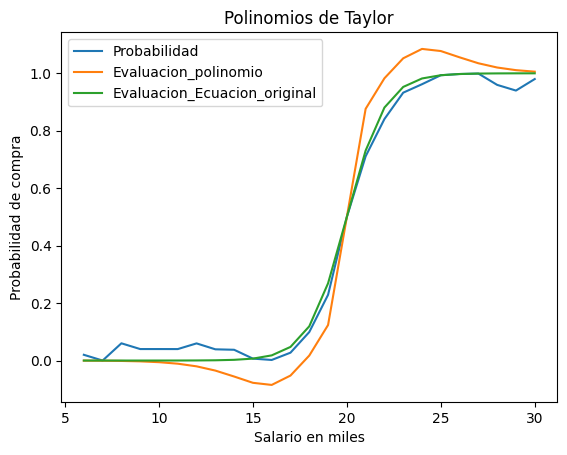

In [24]:
#print(df.head())

df.plot(kind='line', x= 'salario en miles', y= ['Probabilidad','Evaluacion_polinomio','Evaluacion_Ecuacion_original'])

plt.title('Polinomios de Taylor')
plt.xlabel('Salario en miles')
plt.ylabel('Probabilidad de compra')

**Conclusiones**

Se pudo observar que el metodo que mejor se acerca a la integral exacta es el metodo de sumas de Riemann usando midpoint ya que se acerco mas con solo 500 particiones.
Al realizar el metodo de trapecios utilizando el mismo numero base de particiones con las que se evaluo el metodo de midpoint, el resutado no logro acercarse a la integral exacta, se jugaron con los valores y se vio que fueron necesarias mas de 100,000 particiones para que el resultado empezara a acercarse.